In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import multiprocessing as mp # module for multiprocessing
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import warnings
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline


In [2]:

# Load the bakruptcy dataset
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/bank.csv")

In [3]:
# The option below will force the print command to display all of the columns requested 
pd.set_option('display.max_columns', None)

warnings.filterwarnings('ignore')

In [4]:
# First, we'll perform all the necessary Exploratory data analysis:

In [5]:
# Check the shape of the dataset
print("Shape of the dataset:", data.shape)
columns = data.columns
column_count = len(data.columns)
print(columns) # This command will print all the column names
print(f'Number of observation: {len(data)}\n')
print("Number of columns:", column_count)

Shape of the dataset: (6819, 96)
Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth

In [6]:
# Check the data types of the columns
print("Data types of the columns:")
print(data.dtypes)

Data_summary = data.describe()
#print(f'Data_summary:\n{Data_summary}\n')

Data types of the columns:
Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [7]:
# Check for missing values
print("Number of missing values in each column:")
print(data.isnull().sum())

Number of missing values in each column:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [8]:
#Therefore, there is no missing values in the dataset.

Distribution of the target variable:
0    6599
1     220
Name: Bankrupt?, dtype: int64


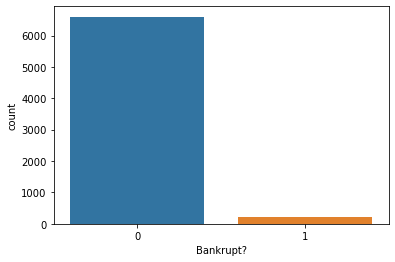

In [9]:
# Check the distribution of the target variable
print("Distribution of the target variable:")
print(data["Bankrupt?"].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x="Bankrupt?", data=data)
plt.show()


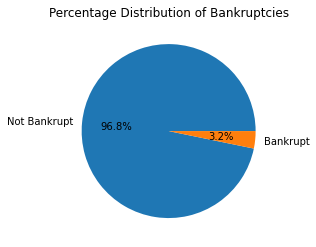

In [10]:
# Calculate the percentage of each target class
counts = data["Bankrupt?"].value_counts()
percentages = [counts[0]/len(data), counts[1]/len(data)]

# Visualize the percentage distribution of the target variable
labels = ['Not Bankrupt', 'Bankrupt']
plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.title("Percentage Distribution of Bankruptcies")
plt.show()


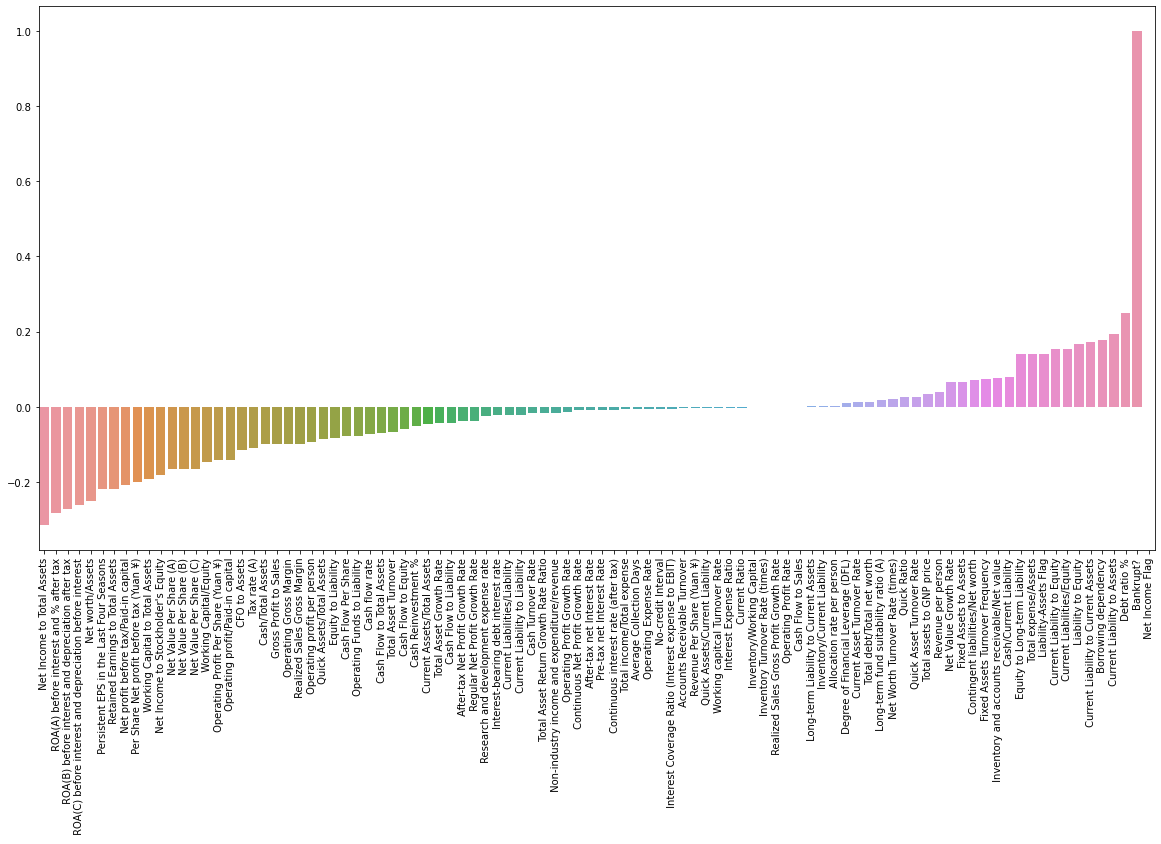

In [11]:
# Check correlation coefficients between features and target variable
correlations = data.corr()["Bankrupt?"].sort_values()

# Plot bar chart of correlation coefficients
plt.figure(figsize=(20,10))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=90)
plt.show()


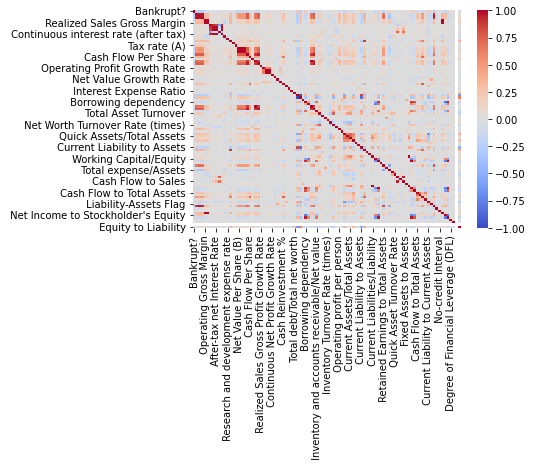

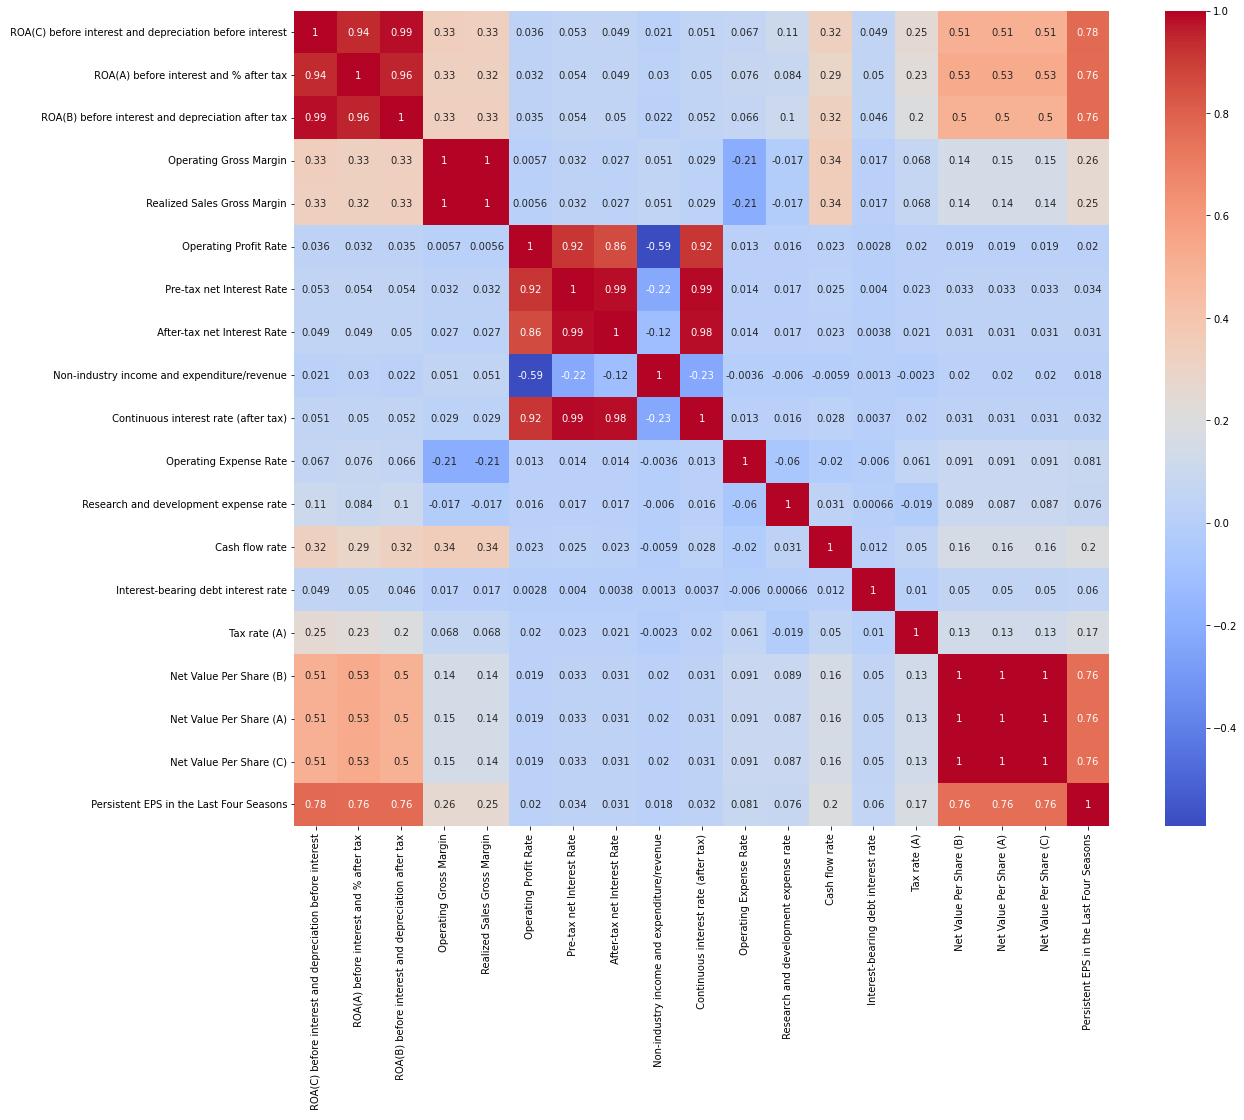

In [12]:
# Check the correlation between features

correlations = data.corr()
correlations.to_excel('corr.xlsx', index=False)
sns.heatmap(correlations, cmap="coolwarm")
plt.show()
# This creates a heatmap to visualize the correlation between features

print("\n")



# 20 features selected for display
features_mean= list(data.columns[1:20])

plt.figure(figsize=(20,15))
sns.heatmap(data[features_mean].corr(),annot=True,square=True,cmap="coolwarm")
plt.show()
plt.close()
print("\n")


In [13]:
# From the bar chart of correlation coefficients between target variable and features, we note that:
# many features have correlation coefficients close to 0, indicating that they are not strongly associated with bankruptcy.


# Next, the heatmap obtained shows the correlation between each pair of features in the dataset. 
# This will guide us in selecting relevant features for our model and identify whether there is any multicollinearity.
# Based on the heatmap, we note the following observations:

# 1. The majority of features in the dataset have very low or no correlation with the target variable, "Bankrupt?". 
  # This suggests that there may be no single feature that strongly predicts whether a company will go bankrupt or not, and a combination of features may be needed for accurate predictions.
# 2. Some features are strongly positively correlated with each other, such as "Current Liability to Liability" and "Total liabilities/Total assets", which have a correlation coefficient of 0.88. This suggests that these features may be measuring similar aspects of a company's financial health and may not provide much additional information if used together in a predictive model.
# 3. There are a few features that are negatively correlated with the target variable, such as "ROA(C) before interest and depreciation before interest" and "ROA(A) before interest and % after tax", which have correlation coefficients of -0.07 and -0.06, respectively. This suggests that these features may be useful in predicting bankruptcy, as companies with lower values of these features are less likely to go bankrupt.
# 4. Some features have very low correlation with all other features in the dataset, such as "Net Income to Total Assets" and "Cash/Total Assets". This suggests that these features may be measuring unique aspects of a company's financial health and may be useful for predicting bankruptcy even if they are not strongly correlated with other features.
# 5. The correlation heatmap can help guide feature selection and feature engineering, as highly correlated features can be removed to simplify the model and avoid multicollinearity issues, while low-correlation features can be added to provide additional information to the model.


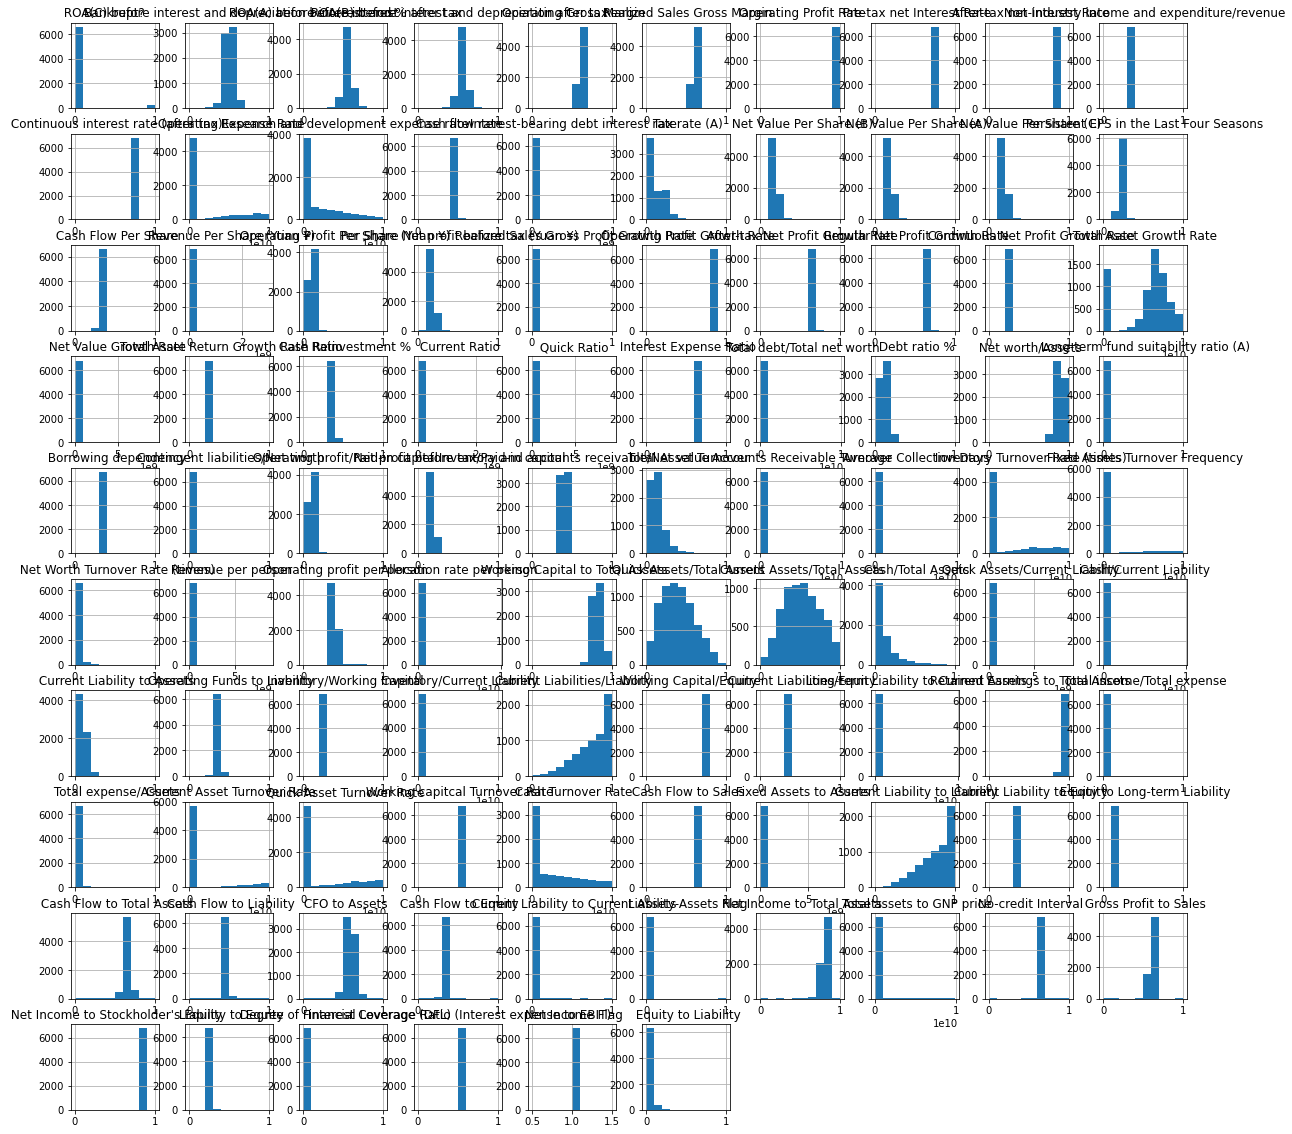

In [14]:
# Plot histograms of all features in one graph
data.hist(figsize=(20, 20))
plt.show()

In [15]:
# Copy the target variable to y and drop it from the dataframe

y = data['Bankrupt?'].copy()
df = data.drop(['Bankrupt?'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# Scale the features
# This is done to ensure that the model is not biased towards features with higher magnitudes.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Number of samples before SMOTE: 5455
Number of samples after SMOTE: 10562


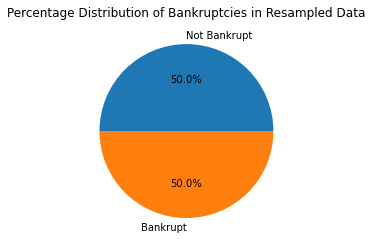

In [16]:
################ SMOTE ANALYSIS ##########################

# Now, since the data set is imbalanced, we will undertake SMOTE analysis. 

# Let's perform SMOTE analysis on the training data :

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the number of samples before and after SMOTE
print("Number of samples before SMOTE:", len(X_train))
print("Number of samples after SMOTE:", len(X_train_resampled))

# Visualize the proportion of bankrupt companies through a pie chart
counts = pd.Series(y_train_resampled).value_counts()
percentages = [counts[0]/len(y_train_resampled), counts[1]/len(y_train_resampled)]
labels = ['Not Bankrupt', 'Bankrupt']
plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.title("Percentage Distribution of Bankruptcies in Resampled Data")
plt.show()


# create a new dataframe with resampled values
resampled_df = pd.DataFrame(X_train_resampled, columns=df.columns)
resampled_df['Bankrupt?'] = y_train_resampled


In [17]:
X_train_reduced = X_train_resampled
y_train_reduced = y_train_resampled

# Filter selected features for test data
X_test_df = X_test
X_test_reduced = X_test

Logistic Regression Results:
[[1186  132]
 [  13   33]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1318
           1       0.20      0.72      0.31        46

    accuracy                           0.89      1364
   macro avg       0.59      0.81      0.63      1364
weighted avg       0.96      0.89      0.92      1364



0.8936950146627566
Accuracy Score: 89.37%


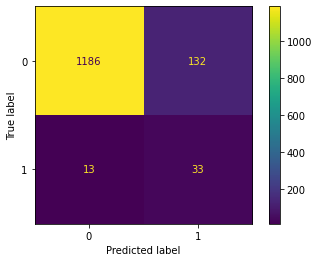

In [18]:
# Now we will run our 6 models with confusion matrix

# 1. Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_reduced, y_train_reduced)
y_pred_logistic = logistic_regression.predict(X_test_reduced)
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print("\n")
print(logistic_regression.score(X_test_reduced, y_test))
cmlg = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cmlg, display_labels=logistic_regression.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_logistic) * 100:.2f}%")

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logistic_regression.score(X_train_reduced, y_train_reduced)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_regression.score(X_test_reduced, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_logistic)))

Accuracy of logistic regression classifier on train set: 0.90
Accuracy of logistic regression classifier on test set: 0.89
Precision of logistic regression classifier on test set: 0.20


In [20]:
# Cross Validation for Logitic Regression

print('Parameters currently in use for logistic regression:\n')
print(logistic_regression.get_params())

Parameters currently in use for logistic regression:

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [21]:
lgrg_paramgrid = {"C": [1, 10, 50, 100], "penalty": ['l1', 'l2', 'elasticnet', 'none']}
lgrg_grid = GridSearchCV(logistic_regression, lgrg_paramgrid)
result = lgrg_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % result.best_params_)

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}


Logistic model Results:
[[1186  132]
 [  13   33]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1318
           1       0.20      0.72      0.31        46

    accuracy                           0.89      1364
   macro avg       0.59      0.81      0.63      1364
weighted avg       0.96      0.89      0.92      1364

Accuracy Score: 89.37%


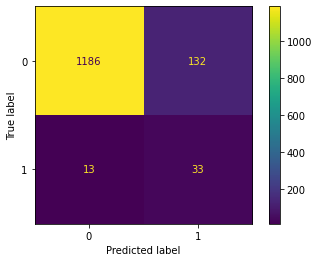

In [69]:
logistic_model = lgrg_grid.best_estimator_
y_pred_logistictuned = logistic_model.predict(X_test_reduced)
print("Logistic model Results:")
print(confusion_matrix(y_test, y_pred_logistictuned))
print(classification_report(y_test, y_pred_logistictuned))
cmlgtuned = confusion_matrix(y_test, y_pred_logistictuned)
disptuned = ConfusionMatrixDisplay(confusion_matrix=cmlgtuned, display_labels=logistic_model.classes_)
disptuned.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_logistictuned) * 100:.2f}%")

In [23]:
print('Accuracy of tuned logistic regression classifier on train set: {:.2f}'.format(logistic_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test_reduced, y_test)))
print('Precision of tuned logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_logistictuned)))

Accuracy of tuned logistic regression classifier on train set: 0.90
Accuracy of tuned logistic regression classifier on test set: 0.89
Precision of tuned logistic regression classifier on test set: 0.20


Linear Discriminant Analysis Results:
[[1186  132]
 [  13   33]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1318
           1       0.20      0.72      0.31        46

    accuracy                           0.89      1364
   macro avg       0.59      0.81      0.63      1364
weighted avg       0.96      0.89      0.92      1364



0.8812316715542522
Accuracy Score: 89.37%


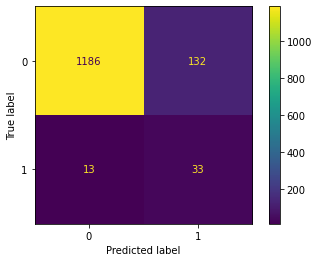

In [24]:
# 2. Linear Discriminant Analysis Regression

lda= LinearDiscriminantAnalysis()
lda.fit(X_train_reduced, y_train_reduced)
y_pred_lda = logistic_regression.predict(X_test_reduced)
print("Linear Discriminant Analysis Results:")
print(confusion_matrix(y_test, y_pred_lda))
print(classification_report(y_test, y_pred_lda))
print("\n")
print(lda.score(X_test_reduced, y_test))
cmlda = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cmlda, display_labels=lda.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_lda) * 100:.2f}%")

In [25]:
print('Accuracy of lda classifier on train set: {:.2f}'.format(lda.score(X_train_reduced, y_train_reduced)))
print('Accuracy of lda classifier on test set: {:.2f}'.format(lda.score(X_test_reduced, y_test)))
print('Precision of lda classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_lda)))

Accuracy of lda classifier on train set: 0.89
Accuracy of lda classifier on test set: 0.88
Precision of lda classifier on test set: 0.20


In [26]:
# Cross Validation for LDA
print('Parameters currently in use for linear discriminant analysis:\n')
print(lda.get_params())

Parameters currently in use for linear discriminant analysis:

{'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': False, 'tol': 0.0001}


In [27]:
lda_paramgrid = { "solver": ['svd', 'lsqr', 'eigen'], "shrinkage": [0, 0.01, 0.05, 0.1, 0.5, 1],}
lda_grid = GridSearchCV(lda, lda_paramgrid)
lda_result = lda_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % lda_result.best_params_)

Best Hyperparameters: {'shrinkage': 0.01, 'solver': 'lsqr'}


LDA model Results:
[[1163  155]
 [  10   36]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      1318
           1       0.19      0.78      0.30        46

    accuracy                           0.88      1364
   macro avg       0.59      0.83      0.62      1364
weighted avg       0.96      0.88      0.91      1364

Accuracy Score: 87.90%


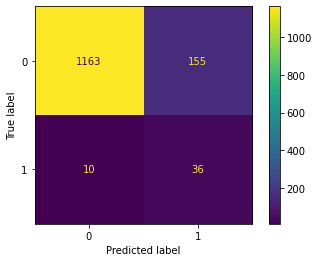

In [42]:
lda_model = lda_grid.best_estimator_
y_pred_ldatuned = lda_model.predict(X_test_reduced)
print("LDA model Results:")
print(confusion_matrix(y_test, y_pred_ldatuned))
print(classification_report(y_test, y_pred_ldatuned))
cmldatuned = confusion_matrix(y_test, y_pred_ldatuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cmldatuned, display_labels=lda_model.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_ldatuned) * 100:.2f}%")

In [43]:
print('Accuracy of tuned lda classifier on train set: {:.2f}'.format(lda_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned lda classifier on test set: {:.2f}'.format(lda_model.score(X_test_reduced, y_test)))
print('Precision of tuned lda classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_ldatuned)))

Accuracy of tuned lda classifier on train set: 0.88
Accuracy of tuned lda classifier on test set: 0.88
Precision of tuned lda classifier on test set: 0.19


In [30]:
# Because above two had penalty terms involved, we did a cross validation for them.
# However, for rest of the models we will apply Principal Component Analysis
# We chose n_components = 95 based on cross validation results for all models (codes for cross validation attached in the end)

# Principal Component Analysis

n_components = 95

pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_train)

# Get the original feature names
original_feature_names = resampled_df.columns

# Map the principal component names to the original feature names
component_names = [f"PC{i+1}" for i in range(n_components)]
component_mapping = dict(zip(component_names, original_feature_names))

# Rename the columns of the principal components
principalComponents_df = pd.DataFrame(principalComponents, columns=component_names)
principalComponents_df = principalComponents_df.rename(columns=component_mapping)




In [31]:
# Filter the principal components from the resampled training data
X_train_reduced = pd.DataFrame(X_train_resampled, columns=df.columns)
X_train_reduced = X_train_reduced[component_mapping.values()]

# Get the corresponding values of the target variable
y_train_reduced = y_train_resampled.iloc[X_train_reduced.index]



# Filter selected features for test data
X_test_df = pd.DataFrame(X_test, columns=df.columns)
X_test_reduced = X_test_df[component_mapping.values()]



# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

Explained variance ratio: [1.32851843e-01 7.57447515e-02 5.26383702e-02 4.67641632e-02
 4.23257654e-02 3.25762205e-02 3.08965653e-02 2.97842901e-02
 2.83602313e-02 2.17640701e-02 2.11623948e-02 2.00528540e-02
 1.78109898e-02 1.64151584e-02 1.62912060e-02 1.49892522e-02
 1.45593092e-02 1.42869025e-02 1.28598265e-02 1.24169330e-02
 1.19538782e-02 1.18408646e-02 1.17001477e-02 1.14000604e-02
 1.12829104e-02 1.11388647e-02 1.09106708e-02 1.08143502e-02
 1.06684038e-02 1.05316703e-02 1.04990416e-02 1.03484906e-02
 1.02391021e-02 9.95711782e-03 9.86209409e-03 9.77659769e-03
 9.59968892e-03 9.41293393e-03 9.24434571e-03 9.12235142e-03
 9.03460291e-03 8.93555542e-03 8.84481935e-03 8.36004192e-03
 8.12230468e-03 7.71506314e-03 7.27752856e-03 6.83753163e-03
 6.10114809e-03 5.81779657e-03 5.67009466e-03 5.01052060e-03
 4.91629394e-03 4.79449971e-03 4.40151086e-03 4.17071454e-03
 3.74128915e-03 3.46341598e-03 2.67249445e-03 2.37681903e-03
 2.19874519e-03 2.11227764e-03 1.75183747e-03 1.66433211e-0

Support Vector Machine Results:
[[1184  134]
 [  13   33]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1318
           1       0.20      0.72      0.31        46

    accuracy                           0.89      1364
   macro avg       0.59      0.81      0.63      1364
weighted avg       0.96      0.89      0.92      1364



0.8922287390029325
Accuracy Score: 89.22%
Accuracy of svm classifier on train set: 0.91
Accuracy of svm classifier on test set: 0.89
Precision of svm classifier on test set: 0.20


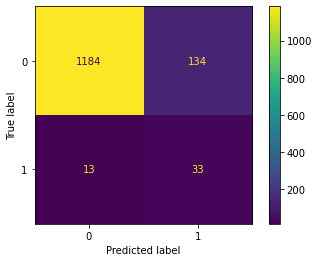

In [35]:
#3. Support Vector machine - Linear

svm = SVC(kernel='linear')
svm.fit(X_train_reduced, y_train_reduced)
y_pred_svm = svm.predict(X_test_reduced)
print("Support Vector Machine Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("\n")
print(svm.score(X_test_reduced, y_test))
cmsvm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvm, display_labels=svm.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print('Accuracy of svm classifier on train set: {:.2f}'.format(svm.score(X_train_reduced, y_train_reduced)))
print('Accuracy of svm classifier on test set: {:.2f}'.format(svm.score(X_test_reduced, y_test)))
print('Precision of svm classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_svm)))

In [36]:
print('Parameters currently in use for SVM linear:\n')
print(svm.get_params())

Parameters currently in use for SVM linear:

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [37]:
svm_paramgrid = { "gamma": [0.0001, 0.0005, 0.001, 0.005],}
svm_grid = GridSearchCV(svm, svm_paramgrid)
svm_result = svm_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % svm_result.best_params_)

Best Hyperparameters: {'gamma': 0.0001}


SVM model Results:
[[1184  134]
 [  13   33]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1318
           1       0.20      0.72      0.31        46

    accuracy                           0.89      1364
   macro avg       0.59      0.81      0.63      1364
weighted avg       0.96      0.89      0.92      1364

Accuracy Score: 89.22%
Accuracy of tuned svm classifier on train set: 0.91
Accuracy of tuned svm classifier on test set: 0.89
Precision of tuned svm classifier on test set: 0.20


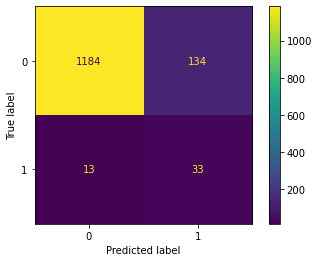

In [38]:
svm_model = svm_grid.best_estimator_
y_pred_svmtuned = svm_model.predict(X_test_reduced)
print("SVM model Results:")
print(confusion_matrix(y_test, y_pred_svmtuned))
print(classification_report(y_test, y_pred_svmtuned))
cmsvmtuned = confusion_matrix(y_test, y_pred_svmtuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvmtuned, display_labels=svm_model.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svmtuned) * 100:.2f}%")
print('Accuracy of tuned svm classifier on train set: {:.2f}'.format(svm_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned svm classifier on test set: {:.2f}'.format(svm_model.score(X_test_reduced, y_test)))
print('Precision of tuned svm classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_svmtuned)))

Support Vector Machine with RBF kernel function Results:
[[1199  119]
 [  15   31]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1318
           1       0.21      0.67      0.32        46

    accuracy                           0.90      1364
   macro avg       0.60      0.79      0.63      1364
weighted avg       0.96      0.90      0.93      1364



0.9017595307917888
Accuracy of svm rbf classifier on train set: 0.94
Accuracy of svm rbf classifier on test set: 0.90
Precision of svm rbf classifier on test set: 0.21


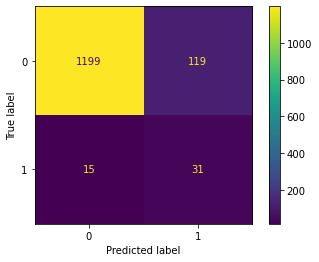

In [39]:
# 4. Support Vector Machine with RBF kernel function


svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_reduced, y_train_reduced)
y_pred_svm_rbf = svm_rbf.predict(X_test_reduced)
print("Support Vector Machine with RBF kernel function Results:")
print(confusion_matrix(y_test, y_pred_svm_rbf))
print(classification_report(y_test, y_pred_svm_rbf))
print("\n")
print(svm_rbf.score(X_test_reduced, y_test))
cm_svmrbf = confusion_matrix(y_test, y_pred_svm_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svmrbf, display_labels=svm_rbf.classes_)
disp.plot()
print('Accuracy of svm rbf classifier on train set: {:.2f}'.format(svm_rbf.score(X_train_reduced, y_train_reduced)))
print('Accuracy of svm rbf classifier on test set: {:.2f}'.format(svm_rbf.score(X_test_reduced, y_test)))
print('Precision of svm rbf classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_svm_rbf)))

In [40]:
print('Parameters currently in use for SVM linear:\n')
print(svm_rbf.get_params())

Parameters currently in use for SVM linear:

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [41]:
svmrbf_paramgrid = { "gamma": [0.0001, 0.0005, 0.001, 0.005],}
svmrbf_grid = GridSearchCV(svm_rbf, svmrbf_paramgrid)
svmrbf_result = svmrbf_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % svmrbf_result.best_params_)

Best Hyperparameters: {'gamma': 0.005}


SVM RBF model Results:
[[1193  125]
 [  15   31]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.94      1318
           1       0.20      0.67      0.31        46

    accuracy                           0.90      1364
   macro avg       0.59      0.79      0.63      1364
weighted avg       0.96      0.90      0.92      1364

Accuracy Score: 89.22%
Accuracy of tuned svm classifier on train set: 0.93
Accuracy of tuned svm classifier on test set: 0.90
Precision of tuned svm classifier on test set: 0.20


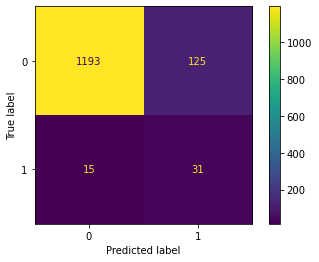

In [45]:
svmrbf_model = svmrbf_grid.best_estimator_
y_pred_svmrbftuned = svmrbf_model.predict(X_test_reduced)
print("SVM RBF model Results:")
print(confusion_matrix(y_test, y_pred_svmrbftuned))
print(classification_report(y_test, y_pred_svmrbftuned))
cmsvmrbftuned = confusion_matrix(y_test, y_pred_svmrbftuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cmsvmrbftuned, display_labels=svmrbf_model.classes_)
disp.plot()
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svmtuned) * 100:.2f}%")
print('Accuracy of tuned svm classifier on train set: {:.2f}'.format(svmrbf_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned svm classifier on test set: {:.2f}'.format(svmrbf_model.score(X_test_reduced, y_test)))
print('Precision of tuned svm classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_svmrbftuned)))

Decision Tree Results:
[[1253   65]
 [  28   18]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1318
           1       0.22      0.39      0.28        46

    accuracy                           0.93      1364
   macro avg       0.60      0.67      0.62      1364
weighted avg       0.95      0.93      0.94      1364



Accuracy of DT classifier on train set: 1.00
Accuracy of DT classifier on test set: 0.93
Precision of DT classifier on test set: 0.22


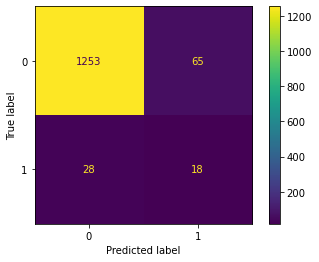

In [46]:
# 5. Decision Tree


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_reduced, y_train_reduced)
y_pred_dt = decision_tree.predict(X_test_reduced)
print("Decision Tree Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("\n")
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=decision_tree.classes_)
disp.plot()
print('Accuracy of DT classifier on train set: {:.2f}'.format(decision_tree.score(X_train_reduced, y_train_reduced)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(decision_tree.score(X_test_reduced, y_test)))
print('Precision of DT classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_dt)))

In [47]:
dt_paramgrid = { "criterion": ['gini','entropy'], "max_depth": ['None', 10, 20, 40], "min_samples_leaf":[1, 2, 5, 10,],}
dt_grid = GridSearchCV(decision_tree, dt_paramgrid)
dt_result = dt_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % dt_result.best_params_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}


Decision Tree model Results:
[[1249   69]
 [  28   18]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1318
           1       0.21      0.39      0.27        46

    accuracy                           0.93      1364
   macro avg       0.59      0.67      0.62      1364
weighted avg       0.95      0.93      0.94      1364

Accuracy of tuned DT  classifier on train set: 0.99
Accuracy of tuned DT classifier on test set: 0.93
Precision of tuned DT classifier on test set: 0.21


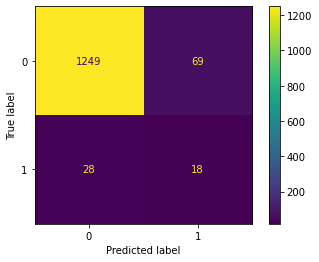

In [68]:
dt_model = dt_grid.best_estimator_
y_pred_dttuned = dt_model.predict(X_test_reduced)
print("Decision Tree model Results:")
print(confusion_matrix(y_test, y_pred_dttuned))
print(classification_report(y_test, y_pred_dttuned))
cm_dttuned = confusion_matrix(y_test, y_pred_dttuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dttuned, display_labels=dt_model.classes_)
disp.plot()
print('Accuracy of tuned DT  classifier on train set: {:.2f}'.format(dt_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned DT classifier on test set: {:.2f}'.format(dt_model.score(X_test_reduced, y_test)))
print('Precision of tuned DT classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_dttuned)))

Random Forest Results:
[[1289   29]
 [  29   17]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.37      0.37      0.37        46

    accuracy                           0.96      1364
   macro avg       0.67      0.67      0.67      1364
weighted avg       0.96      0.96      0.96      1364



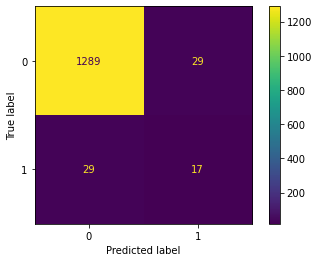

In [49]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_reduced, y_train_reduced)
y_pred_rf = random_forest.predict(X_test_reduced)
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
disp.plot()

In [50]:
rf_paramgrid = {"max_depth": ['None', 10, 20, 40], "min_samples_leaf":[1, 2, 5, 10,],}
rf_grid = GridSearchCV(random_forest, rf_paramgrid)
rf_result = rf_grid.fit(X_train_reduced, y_train_reduced)
print('Best Hyperparameters: %s' % rf_result.best_params_)

Best Hyperparameters: {'max_depth': 40, 'min_samples_leaf': 1}


Random forest model Results:
[[1290   28]
 [  29   17]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1318
           1       0.38      0.37      0.37        46

    accuracy                           0.96      1364
   macro avg       0.68      0.67      0.68      1364
weighted avg       0.96      0.96      0.96      1364

Accuracy of tuned RF  classifier on train set: 1.00
Accuracy of tuned RF classifier on test set: 0.96
Precision of tuned RF classifier on test set: 0.38


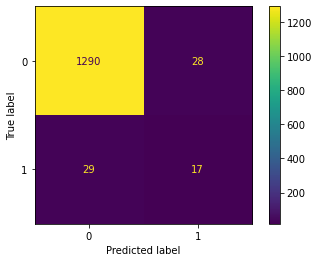

In [67]:
rf_model = rf_grid.best_estimator_
y_pred_rftuned = rf_model.predict(X_test_reduced)
print("Random forest model Results:")
print(confusion_matrix(y_test, y_pred_rftuned))
print(classification_report(y_test, y_pred_rftuned))

cm_rftuned = confusion_matrix(y_test, y_pred_rftuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rftuned, display_labels=rf_model.classes_)
disp.plot()
print('Accuracy of tuned RF  classifier on train set: {:.2f}'.format(rf_model.score(X_train_reduced, y_train_reduced)))
print('Accuracy of tuned RF classifier on test set: {:.2f}'.format(rf_model.score(X_test_reduced, y_test)))
print('Precision of tuned RF classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred_rftuned)))

In [53]:
# Store the results of each model in a dictionary
results = {
    'Logistic Regression': (confusion_matrix(y_test, y_pred_logistictuned), 
                           classification_report(y_test, y_pred_logistictuned, output_dict=True)),
    'Linear Discriminant Analysis': (confusion_matrix(y_test, y_pred_ldatuned), 
                           classification_report(y_test, y_pred_ldatuned, output_dict=True)),
    'Support Vector Machine': (confusion_matrix(y_test, y_pred_svmtuned), 
                           classification_report(y_test, y_pred_svmtuned, output_dict=True)),
    'Support Vector Machine with kernel': (confusion_matrix(y_test, y_pred_svm_rbf), 
                           classification_report(y_test, y_pred_svm_rbf, output_dict=True)),
    'Decision Tree': (confusion_matrix(y_test, y_pred_dttuned), 
                      classification_report(y_test, y_pred_dt, output_dict=True)),
    'Random Forest': (confusion_matrix(y_test, y_pred_rftuned), 
                      classification_report(y_test, y_pred_rftuned, output_dict=True)),
}

In [54]:
# Compare the F1 scores of each model
f1_scores = {}
for model, (cm, cr) in results.items():
    f1_scores[model] = cr['weighted avg']['f1-score']

# Select the model with the highest F1 score
best_model1 = max(f1_scores, key=f1_scores.get)
print("The best model1 is:", best_model1)

The best model1 is: Random Forest


In [55]:
print(f1_scores)

{'Logistic Regression': 0.9211590424457134, 'Linear Discriminant Analysis': 0.9125164188465164, 'Support Vector Machine': 0.9202473154136188, 'Support Vector Machine with kernel': 0.9258057519681999, 'Decision Tree': 0.9411108679789837, 'Random Forest': 0.9579894581546019}


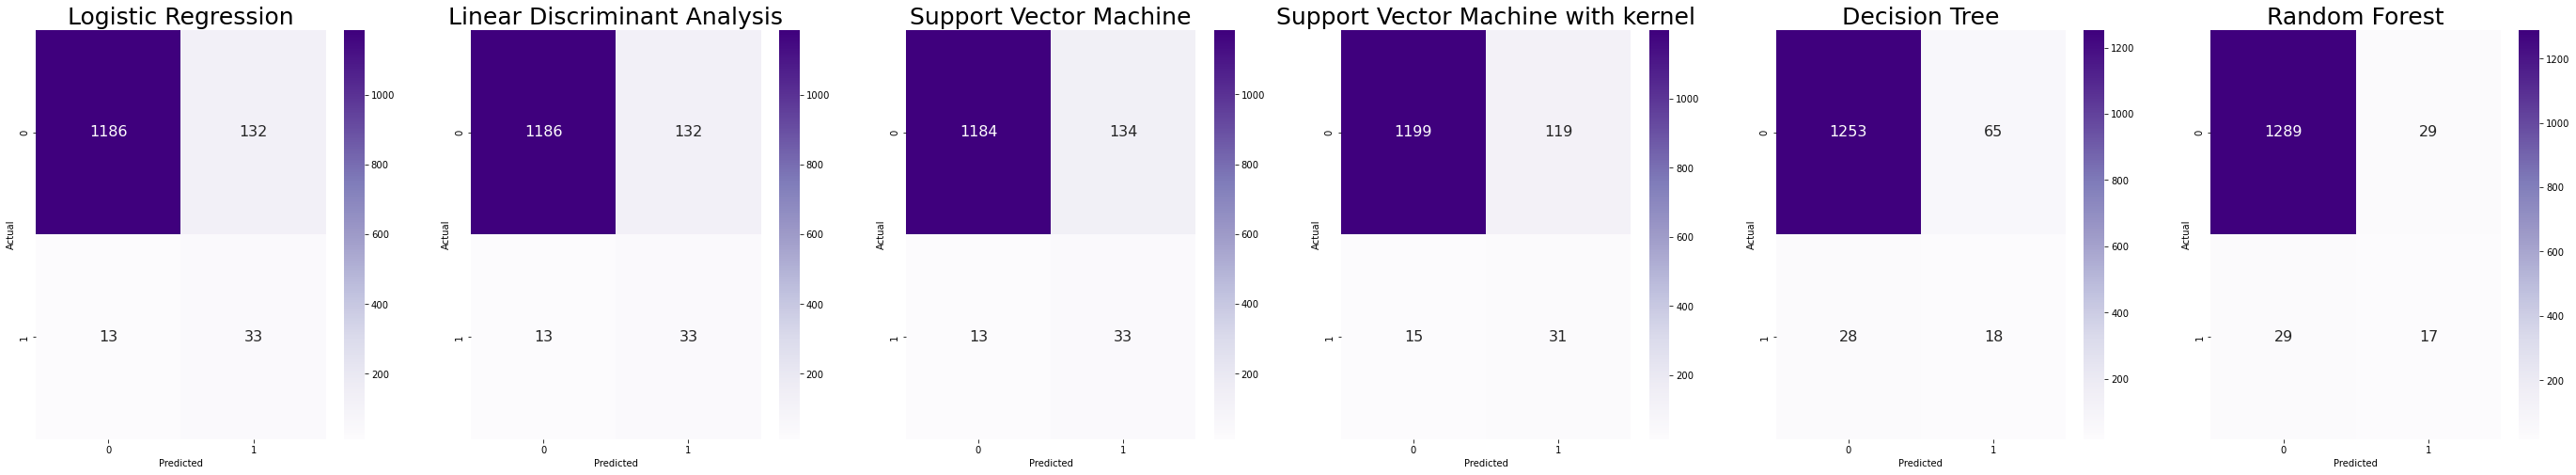

In [64]:
heat_cmlgtuned = pd.DataFrame(cmlg, columns=np.unique(y_test), index = np.unique(y_test))
heat_cmlgtuned.index.name = 'Actual'
heat_cmlgtuned.columns.name = 'Predicted'

heat_cmldatuned = pd.DataFrame(cmlda, columns=np.unique(y_test), index = np.unique(y_test))
heat_cmldatuned.index.name = 'Actual'
heat_cmldatuned.columns.name = 'Predicted'

heat_cmsvmtuned = pd.DataFrame(cmsvm, columns=np.unique(y_test), index = np.unique(y_test))
heat_cmsvmtuned.index.name = 'Actual'
heat_cmsvmtuned.columns.name = 'Predicted'

heat_cmsvmrbftuned = pd.DataFrame(cm_svmrbf, columns=np.unique(y_test), index = np.unique(y_test))
heat_cmsvmrbftuned.index.name = 'Actual'
heat_cmsvmrbftuned.columns.name = 'Predicted'

heat_cm_dttuned = pd.DataFrame(cm_dt, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm_dttuned.index.name = 'Actual'
heat_cm_dttuned.columns.name = 'Predicted'

heat_cm_rftuned = pd.DataFrame(cm_rf, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm_rftuned.index.name = 'Actual'
heat_cm_rftuned.columns.name = 'Predicted'

f, ax = plt.subplots(1, 6, figsize=(20,8))
f.subplots_adjust(left=None, bottom=None, right= 2, top=None, wspace=None, hspace= None)

sns.heatmap(heat_cmlgtuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[0])
ax[0].set_title('Logistic Regression', fontsize = 25)
sns.heatmap(heat_cmldatuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[1])
ax[1].set_title('Linear Discriminant Analysis', fontsize = 25)
sns.heatmap(heat_cmsvmtuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[2])
ax[2].set_title('Support Vector Machine', fontsize = 25)
sns.heatmap(heat_cmsvmrbftuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[3])
ax[3].set_title('Support Vector Machine with kernel', fontsize = 25)
sns.heatmap(heat_cm_dttuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[4])
ax[4].set_title('Decision Tree', fontsize = 25)
sns.heatmap(heat_cm_rftuned, cmap="Purples", annot=True, annot_kws={"size": 16},fmt='d', ax = ax[5])
ax[5].set_title('Random Forest', fontsize = 25)
plt.show()


plt.show()

In [ ]:
##### Thus, on the basis of both Accuracy and F1-score, we can say Random Forest is the best Model for this training set.
#######################################
################################################### Model Evaluation Ends

In [90]:
# Below Code explains cross-validation process of choosing n_components under PCA for each model used in the analysis.


# we set n_components = 95 for all models based on the results of cross validation for all Models using cross validation
# Results for only two models are included below as they were computationally very expensive.


In [99]:
from imblearn.pipeline import Pipeline as imbpipeline

# Cross-Validation for Random forest

# Set up the pipeline
pipe1 = imbpipeline([
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(max_depth = 40, min_samples_leaf= 1) )
])

# Set up the grid search parameters
param_grid = {
    'pca__n_components': [25, 30, 35, 40, 50,95]
}

# Set up the grid search object
grid_search = GridSearchCV(pipe1, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



Best parameters: {'pca__n_components': 95}
Best score: 0.9995514190794133


In [97]:
# Cross-Validation for SVM - Linear

# Set up the pipeline
pipe2 = imbpipeline([
    ('pca', PCA()),
    ('classifier', SVC(kernel='linear', C=1.0, random_state=0, gamma = 0.0001, shrinking = True))
])

# Set up the grid search parameters
param_grid = {
    'pca__n_components': [35, 40, 50,95]
}

# Set up the grid search object
grid_search = GridSearchCV(pipe2, param_grid=param_grid, cv=10, scoring='roc_auc', n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'pca__n_components': 95}
Best score: 0.954803434895657


In [ ]:
############### Project Ends ###################################

# Thank you!